In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [96]:
df = pd.read_csv('countries_of_the_world_clean.csv')

In [97]:
LE = LabelEncoder()
df['Regional_label'] = LE.fit_transform(df['region'])
df['Climate_label'] = LE.fit_transform(df['climate'])
df.head(10)

,country,region,population,area,population_density,coastline,net_migration,infant_mortality,gdp,literacy_rate,...,crops,other,climate,birthrate,deathrate,agriculture,industry,service,Regional_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380000,0.240,0.380000,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232000,0.188,0.579000,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101000,0.600,0.298000,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.150844,0.272,0.565283,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.150844,0.272,0.565283,10,4
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,2.0,45.11,24.20,0.096000,0.658,0.246000,9,2
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,...,0.00,100.00,2.0,14.17,5.34,0.040000,0.180,0.780000,4,2
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,...,4.55,77.27,2.0,16.93,5.37,0.038000,0.220,0.743000,4,2
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,0.48,87.21,3.0,16.73,7.55,0.095000,0.358,0.547000,4,4
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,...,2.30,80.15,4.0,12.07,8.23,0.239000,0.343,0.418000,2,5


<AxesSubplot:>

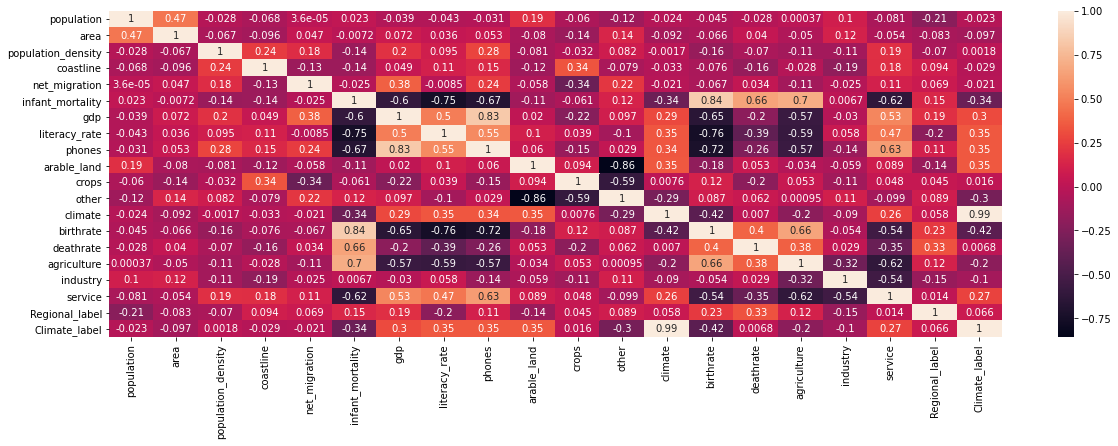

In [98]:
cor = df.corr()
plt.figure(figsize = (20,6))
sns.heatmap(cor, annot = True)

### Cutoff for features is 0.25
### We select: net_migration, literacy_rate, phones, climate, service

In [191]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['net_migration', 'literacy_rate', 'phones', 'Climate_label', 'service']
target = 'gdp'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [192]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
r2_score(Y_test, Y_pred)

0.754414325512939

In [193]:
RF_regressor = RandomForestRegressor(n_estimators = 100, max_depth = 6,  min_weight_fraction_leaf = 0.05, max_features = 0.8,
                                     random_state = 0)
RF_regressor.fit(X_train, Y_train)
Y_pred = RF_regressor.predict(X_test)
r2_score(Y_test, Y_pred)

0.7501001093197083